In [1]:
# import required libraries for this section
import numpy as np
import matplotlib.pyplot as plt
import cv2

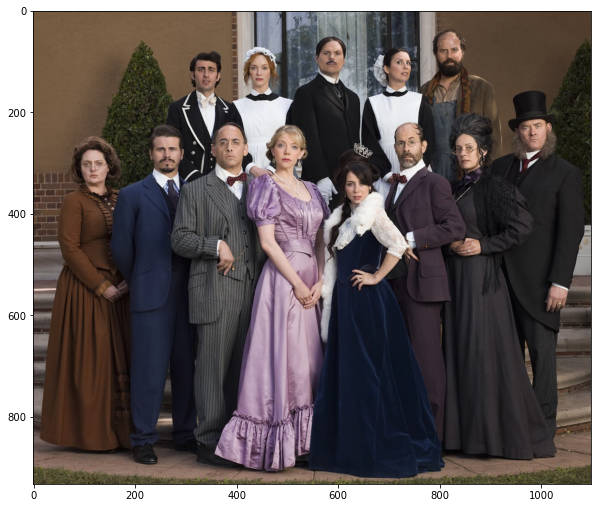

In [2]:
# load in color image for face detection
image = cv2.imread('HaarCascade_files/multi_face.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)

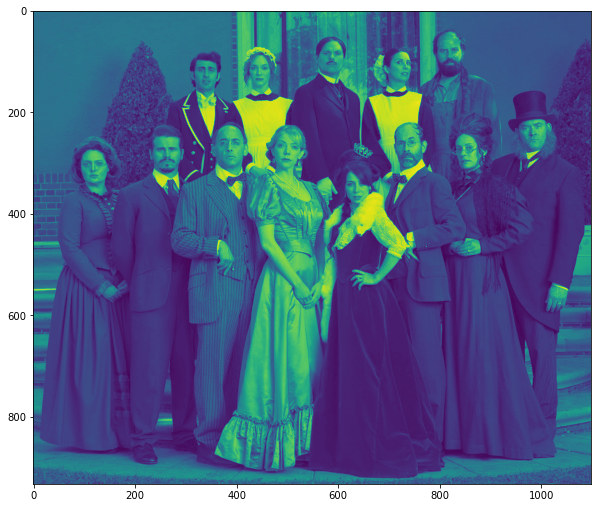

In [3]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray)

In [4]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_eye.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 3)
print(len(faces),len(eyes))
print(faces)
print(eyes)

13 11
[[ 87 277  65  65]
 [706  85  50  50]
 [790  56  61  61]
 [421  95  51  51]
 [313  96  56  56]
 [611 323  54  54]
 [563  64  53  53]
 [953 205  62  62]
 [355 235  66  66]
 [707 239  58  58]
 [233 249  63  63]
 [469 241  67  67]
 [819 248  64  64]]
[[798  68  22  22]
 [819  68  20  20]
 [708  90  23  23]
 [320 103  22  22]
 [338 104  22  22]
 [616 332  20  20]
 [386 248  22  22]
 [715 252  20  20]
 [734 250  22  22]
 [505 258  21  21]
 [478 254  22  22]]


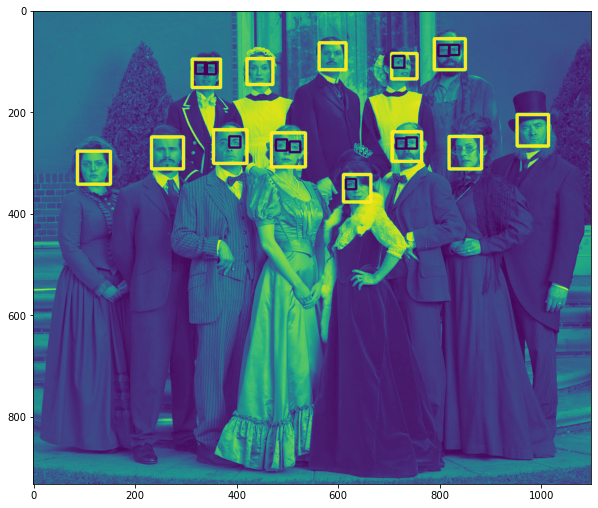

In [5]:
img_with_detections = gray   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    images = cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  
    
    for (x,y,w,h) in eyes:
        images = cv2.rectangle(images,(x,y),(x+w,y+h),(0,255,0),3) 
        #3 is thickness of border, (x,y) is the point where w is streched from x and h is streched from y, (R, G, B) pattern, 
        
    
# print(x,y)
# print(w,h)
# print(x+w,y+h)
# display the result
plt.figure(figsize=(10,10))
plt.imshow(images)

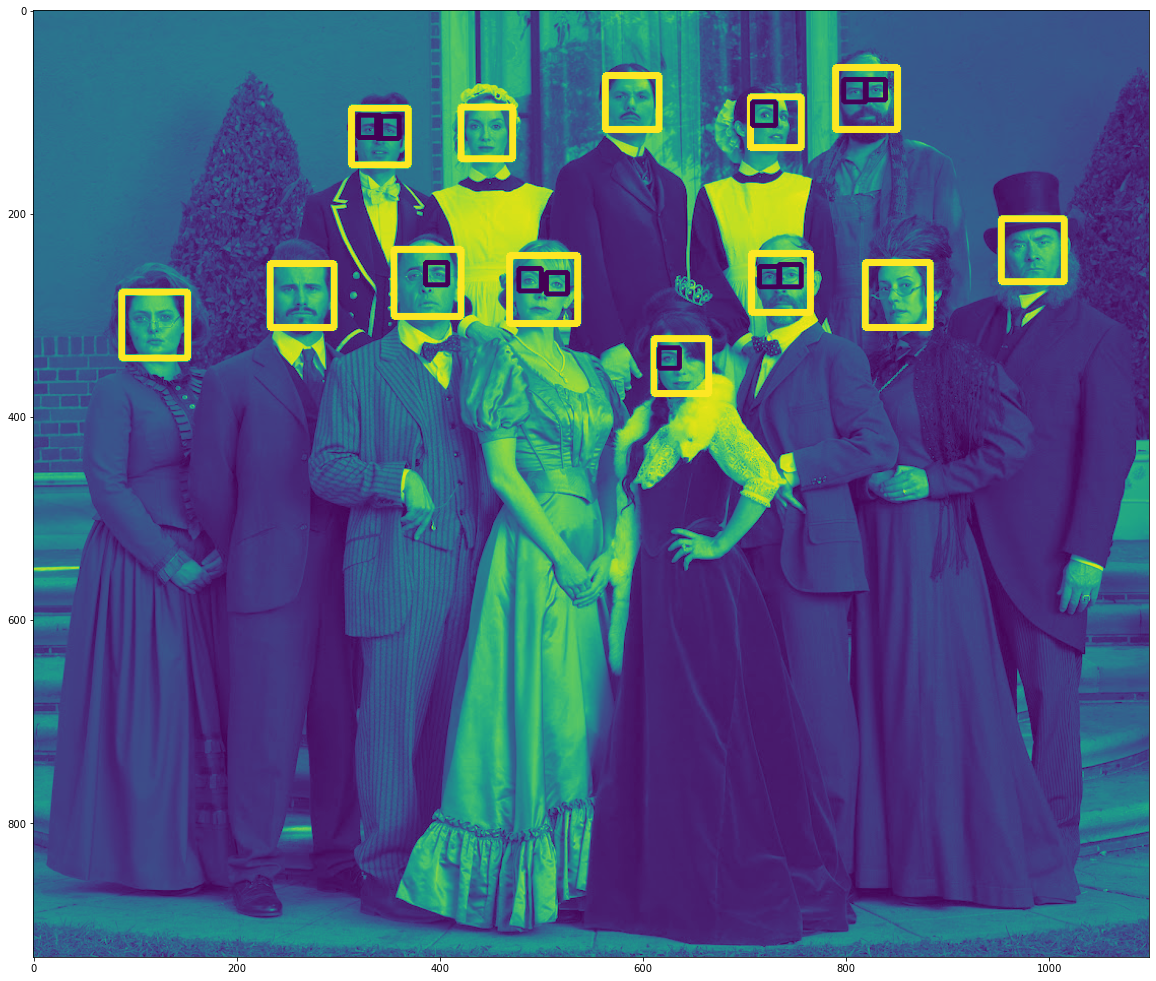

In [6]:
img = cv2.imread("HaarCascade_files/multi_face.jpg", 1)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# locate XML Haar Cascade file(it will be inside site packages/cv2/data)
# cascade_dir = "C:\ProgramData\Anaconda3\Lib\site-packages\cv2\data/"

# face_cascade
face_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_frontalface_default.xml')

# eye_cascade
eye_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_eye.xml')

# find bounding box coordinates of faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# loop through each faces and draw a rectangle
for (x,y,w,h) in faces:
    img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
   

    eyes = eye_cascade.detectMultiScale(roi_gray)
   
    for (ex,ey,ew,eh) in eyes[0:2]:
        imagess = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(20,20))
plt.imshow(images)

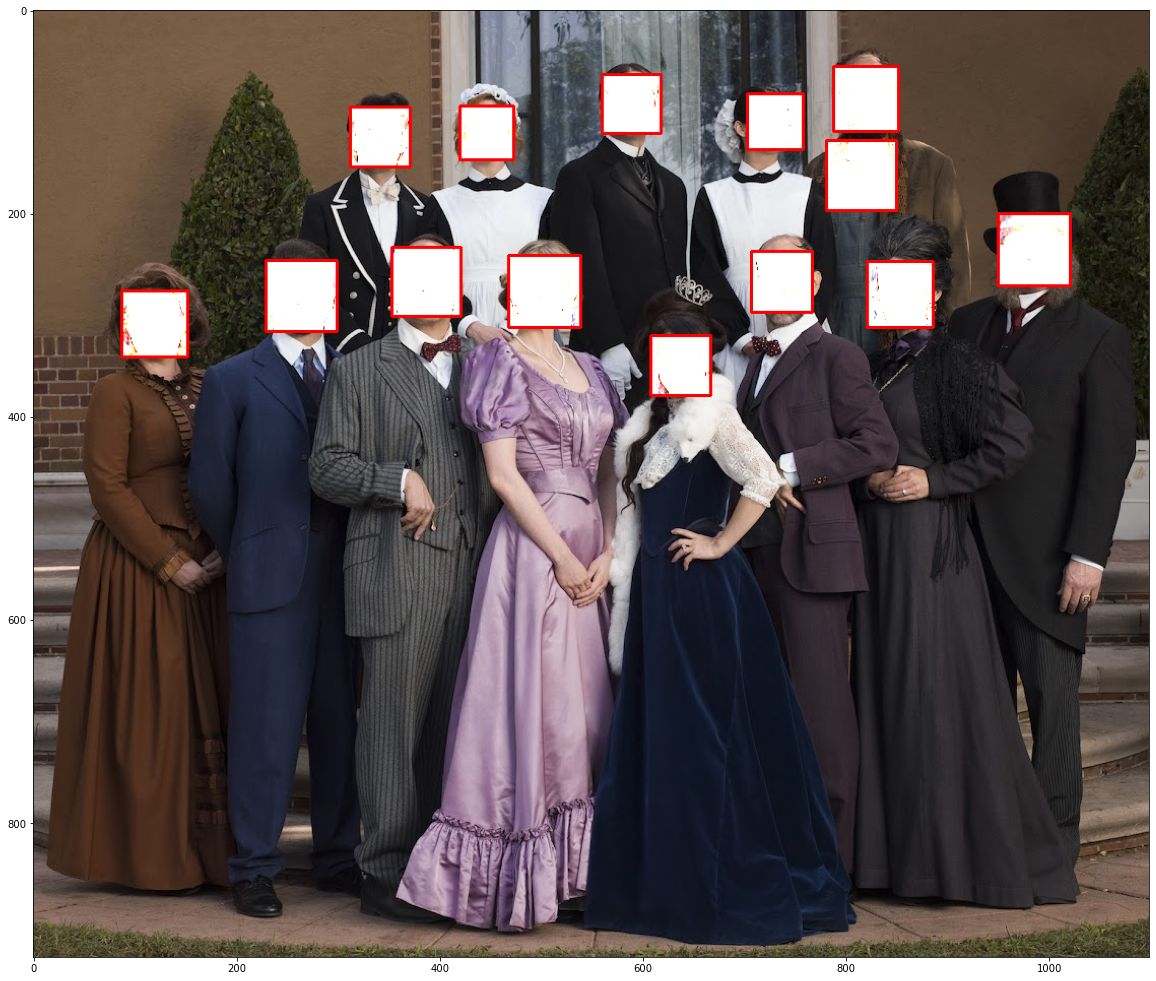

In [8]:
#face bluring
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Haar Cascade
img = cv2.imread("HaarCascade_files/multi_face.jpg", 1)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_y = np.array([[-1,2,-1],
                   [ 0, 10, 0],
                   [ 1, 2, 1]])
# locate XML Haar Cascade file(it will be inside site packages/cv2/data)
# cascade_dir = "C:\ProgramData\Anaconda3\Lib\site-packages\cv2\data/"
# face_cascade
face_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_frontalface_default.xml')

# eye_cascade
eye_cascade = cv2.CascadeClassifier('HaarCascade_files/haarcascade_eye.xml')

# find bounding box coordinates of faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# loop through each faces and draw a rectangle
for (x,y,w,h) in faces:

    image[y:y+h, x:x+w] = cv2.filter2D(image[y:y+h, x:x+w], -1, sobel_y)
    img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)


plt.figure(figsize=(20,20))
plt.imshow(img)